# Assignment 2
- Donwload the credit dataset 'Credit.csv' from  https://github.com/vahidpartovinia/ycbs255/
- Create the attribute matrix  'X' as a subset of the data that includes only the qualitative attributes 'Income', 'Limit', 'Rating', 'Cards', 'Age', and 'Education'
- Create a discrete response variable, say 'y' by transforming 'Balance' to a binary output, which equals 1 if 'Balance > 1500' and equals 0 otherwise.
- Fit 1- logistic regression, 2- linear discriminant, and 3- quadratic discriminant on the binary Balance as the output variable. Use 'Income', 'Limit', 'Rating', 'Cards', 'Age', and 'Education' as the input variables. 
- Find the probability of (Balance > 1500), for x1 and x2 below, using these three methods. Compare these probabilities and comment.


x1= 'Income' = 63, 'Limit' = 8100, 'Rating' = 600, 'Cards' = 4, 'Age' = 30, 'Education' =14 

x2= 'Income' = 186, 'Limit' = 13414, 'Rating' = 950, 'Cards' = 2, 'Age' = 41, 'Education' =13 

# Submission note
Please fill this jupyter notebook. Extract the pdf file as follows. On  Jupyter manue go to File/Print Preview, then on Browser menu go to File/Print. 

## Only PDF  Submissions will be graded


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
credit = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Computational-Applied-Statistics\Assignment 2\Credit.CSV", 
                 encoding='utf-8', index_col=0)
credit = credit[['Balance', 'Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
X = credit[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = np.array([1.0 if x>1500 else 0 for x in credit['Balance']])

In [3]:
X.head()

,Income,Limit,Rating,Cards,Age,Education
1,14.891,3606,283,2,34,11
2,106.025,6645,483,3,82,15
3,104.593,7075,514,4,71,11
4,148.924,9504,681,3,36,11
5,55.882,4897,357,2,68,16


### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression()
model_logreg.fit(X=X, y=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Linear Discriminant

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lindisc = LinearDiscriminantAnalysis()
model_lindisc.fit(X=X, y=y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

### Quadratic Discriminant

In [6]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_quaddisc = QuadraticDiscriminantAnalysis()
model_quaddisc.fit(X=X, y=y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

#### Inputs

In [7]:
x1 = np.array([63, 8100, 600, 4, 30, 14]).reshape(1,6)
x2 = np.array([186, 13414, 950, 2, 41, 13]).reshape(1,6)

#### x1

In [8]:
print("Logistic Regression Probability of Balance over $1500: {}".format(model_logreg.predict_proba(x1)[:, 1][0]))
print("Linear Discriminant Probability of Balance over $1500: {}".format(model_lindisc.predict_proba(x1)[:, 1][0]))
print("Quadratic Discriminant Probability of Balance over $1500: {}".format(model_quaddisc.predict_proba(x1)[:, 1][0]))

Logistic Regression Probability of Balance over $1500: 0.06772607299949442
Linear Discriminant Probability of Balance over $1500: 0.05855428095398292
Quadratic Discriminant Probability of Balance over $1500: 1.2441920661065055e-09


#### x2

In [9]:
print("Logistic Regression Probability of Balance over $1500: {}".format(model_logreg.predict_proba(x2)[:, 1][0]))
print("Linear Discriminant Probability of Balance over $1500: {}".format(model_lindisc.predict_proba(x2)[:, 1][0]))
print("Quadratic Discriminant Probability of Balance over $1500: {}".format(model_quaddisc.predict_proba(x2)[:, 1][0]))

Logistic Regression Probability of Balance over $1500: 0.8270789019811116
Linear Discriminant Probability of Balance over $1500: 0.9927880109254115
Quadratic Discriminant Probability of Balance over $1500: 0.9992169422475801


## Comments

From the results above it seems that the order of "certainty" of prediction of balance over 1500 is ordered Logistic Regression, Linear Discriminant, and Quadratic Discriminant (ordered from less certain to more certain). X1 data point seems to represent a subject that is unlikely to have a balance over 1500 while X2 a subject that is likely to have over this balance. With this being said the Quadratic Discriminant result is more certain of this prediction by the probability generated while the Logistic Regression result is the least certain (lower probability).

One of the ways Linear Discriminant and Quadratic Discriminant are different from Logistic Regression is that using the discriminant models we are modelling the distribution of the predictors (X) separately for each response class (Y). Using Bayes' theorem we can flip these into estimates of class Y given X is true. The linear discriminant and quadratic discriminant also assumes that the observations from each class are drawn from a Gaussian distribution. 

The difference between QDA and LDA is that QDA assumes that each class has its own covariance matrix (not true for LDA). The drawback to LDA is that if the assumption that the K classes share a common covariance matrix is too "off" - then it can suffer from a high bias (something to keep in mind when using this model). The affect on QDA is that assuming each class has it's own covariance matrix increases the number of parameters needing to be computed over LDA. Since the number of predictors we are using in this dataset is small (6) we will not be heavily punished for this (appealing in the argument for using QDA in our case). QDA can also be punished if the number of observations is small - which is not the case in our dataset (400 observations). Since our dataset is avoiding the drawbacks of using QDA we should use this model for better prediction results (QDA allows for a higher variance in the model classes leading to better performance). QDA is said to be more "flexible" for this reason.

It seems that since the class of y is imbalanced (significantly more samples have a balance less than 1500) linear and quadratic discriminant analysis will out-perform logistic regression. This is due to the fact that imbalanced datasets will affect the logistic regression intercept. This is to say that the probabilty of the class will be moved and skew probabilities towards the more represented class.

If the classes of Y are well-separated, the sample size is small, and the predictors (X) are approximately normal in each class - logistic regression is said to be unstable. Since the distribution of features in X seem to be somewhat normally distributed this might cause a problem for logistic regression (see below for histograms of X features for both classes).

In conclusion - the argument against logistic regression is that the predictors are approximately normally distributed and the class is imbalanced (leading to an unstable & lower-performing model of the under-represented class). With this in mind, the argument for QDA over LDA is that we have few predictors and a large dataset so we can take full advantage of the power/flexibility of QDA while avoiding it's pitfalls. The advantage then of using QDA is that we can have a larger variance of the model classes and therefore increase performance (more flexible).

## Reccomendation: use QDA.

### Histograms of features (X) for both classes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BA6D2E6A0>,
      dtype=object)

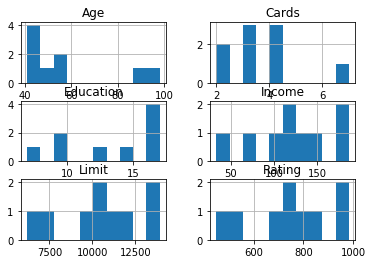

In [10]:
X[y==1].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BA6D14AC8>,
      dtype=object)

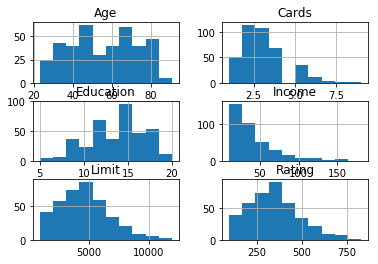

In [11]:
X[y==0].hist()